# **1. Introduction**
Multivariable linear regression is an extension of simple linear regression that allows us to model the relationship between a target variable and multiple features. In this notebook, we will implement a multivariable linear regression model to predict the price of a house based on its size, number of bedrooms, and age. By analyzing how these features collectively influence the price, we aim to derive a linear relationship between the target variable and the multiple input features.

In [2]:
# Libraries we'll need
import numpy as np
from matplotlib import pyplot as plt

# **2. Dataset Description**
We will work with a synthetic dataset that contains information about house sizes, number of bedrooms, age, and their corresponding prices. The dataset is represented as NumPy arrays for efficient computation.

- **Feature 1 ($X_1$):** The size of the house in square meters.
- **Feature 2 ($X_2$):** The number of bedrooms.
- **Feature 3 ($X_3$):** The age of the house in years.
- **Target (y):** The price of the house in thousands of dollars.

In [28]:
# Generate 50 random values for the features
np.random.seed(42)  # Set seed for reproducibility

# Feature 1 (X1): Size of the house in square meters (hundreds)
X1 = np.random.uniform(0.5, 2.0, 50)

# Feature 2 (X2): Number of bedrooms (1 to 5)
X2 = np.random.randint(1, 6, 50)

# Feature 3 (X3): Age of the house in years (0 to 60)
X3 = np.random.randint(0, 61, 50)

# Stack the features into a single matrix
X = np.stack((X1, X2, X3),axis=-1)

# Coefficients for each feature
coefficients = np.array([50, 20, -2])

# Target (y): Price of the house in thousands of dollars
# For simplicity, let's assume a linear relationship with some noise
y = X.dot(coefficients) + np.random.normal(0, 10)

# **3. Exploratory Data Analysis (EDA)**
In this section, we will visualize the relationships between the features ($X_1, X_2, X_3$) and the target variable (y). We will use scatter plots and 3D plots to observe any potential linear relationships.

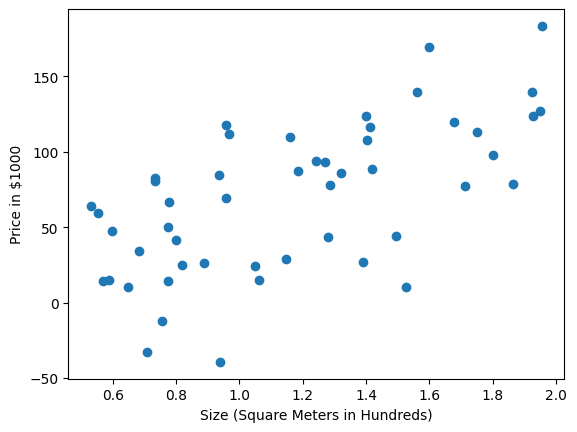

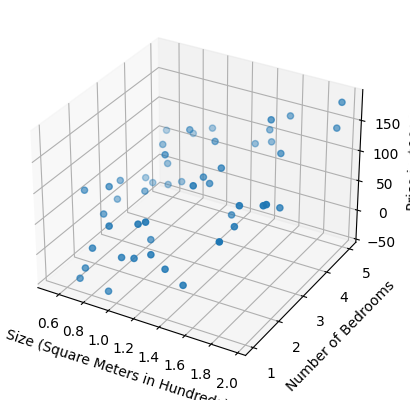

In [37]:
# Scatter plot between Size and Price
plt.scatter(X1, y)
plt.xlabel('Size (Square Meters in Hundreds)')
plt.ylabel('Price in $1000')
plt.show()

# 3D plot of Size, Bedrooms, and Price
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y)
ax.set_xlabel('Size (Square Meters in Hundreds)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price in $1000')
plt.show()

# **4. Linear Regression Theory**
We will use multivariable linear regression to model the relationship between the house features (size, number of bedrooms, age) and its price. The multivariable linear regression model aims to fit a hyperplane that best represents the data, minimizing the difference between the actual prices and the predicted prices.

# **5. Model Implementation**
We will implement the multivariable linear regression model using the dataset represented in NumPy format. The steps include:

- Splitting the data into training and testing sets.
- Training the model to learn the relationship between the features and the target variable.
- Making predictions using the trained model.

In [38]:
# Use 80% of dataset for training
training_set_x=X[:int(len(X)*0.8)]
training_set_y=y[:int(len(X)*0.8)]

**Compute the MSE**

The Mean Squared Error (MSE) is a common metric used to evaluate the performance of a regression model. It measures the average of the squares of the errors, where the error is the difference between the actual value
y and the predicted value. The MSE provides a sense of how far off the model’s predictions are from the true values on average, with larger errors contributing more heavily due to the squaring operation. Mathematically, it is defined as:

$ MSE = \frac{1}{n} \sum_{i=1}^n (y^i - ŷ ^i)^2$

Where:

- n is the number of data points.
- $y^i$ represents the actual value for the
ith data point.
- $y ̂^i$ represents the predicted value for the
ith data point.

In this section, we will compute the MSE to quantify the average error of our model’s predictions. A lower MSE indicates a better fit of the model to the data.

In [39]:
'''
Arguments:
  X - features [size=(50,3)]
  y - target [size = (50,)]
  w - weights (coefficients) [size = 3,1]
  b - bias [scalar]
  -----------------------------
  returns the mean squared error [scalar]
'''
def compute_mse(X,y,w,b):
  y_pred = X.dot(w_init) + b
  total_cost = sum((y-y_pred)**2)
  return total_cost / X.shape[0]

**Compute the gradient descent**

In the context of linear regression, the gradient represents the vector of partial derivatives of the cost function (such as MSE) with respect to each of the model's parameters (coefficients). The gradient indicates the direction and rate of change of the cost function with respect to the parameters. By computing the gradient, we can understand how to adjust the model’s parameters to reduce the error.

For a linear regression model, the gradient of the MSE with respect to each parameter $w^j$ is calculated as follows:

$\frac{\partial}{\partial w_j} \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i^j$

$\frac{\partial}{\partial b} \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)$

Where:
- $w^j$ is the coefficient for the
jth term in the polynomial.
- $x_i^j$ is the
jth power of the x value for the
ith data point.

In this section, we will compute the gradient for each parameter to determine how the parameters should be updated during the optimization process.

In [40]:
'''
Arguments:
  X - features [size=(50,3)]
  y - target [size = (50,)]
  w - weights (coefficients) [size = 3,1]
  b - bias [scalar]
  -----------------------------
  returns the gradient for each w and b ([size=3,1], scalar)
'''
def compute_gradient(X,y,w,b):
  n = X.shape[0]

  y_pred = X.dot(w_init) + b

  gradientW = X.T.dot(y - y_pred) / n
  gradientB = np.sum(y - y_pred) / n

  return gradientW, gradientB

**Gradient Descent**

Gradient Descent is an optimization algorithm used to minimize the cost function by iteratively adjusting the model’s parameters in the direction of the steepest descent, as defined by the negative of the gradient. The algorithm starts with an initial set of parameters and iteratively updates them using the computed gradient until the parameters converge to values that minimize the cost function.
The update rule for each parameter $w_j$ and b in polynomial regression is:

$w_j := w_j - \alpha \cdot \frac{\partial}{\partial w_j} \text{MSE}$

$b := b - \alpha \cdot \frac{\partial}{\partial b} \text{MSE}$

In [41]:
'''
Arguments:
  X - features [size=(50,3)]
  y - target [size = (50,)]
  w - weights (coefficients) [size = 3,1]
  b - bias [scalar]
  num_iter - number of iterations [scalar]
  learning_rate - the alpha in the forumla [scalar]
  -----------------------------
  returns the final w and b ([size=3,1], scalar)
'''
def gradient_descent(X,y,w_init,b_init,num_iter,learning_rate):
    n = X.shape[0]
    w = w_init
    b = b_init

    # train the data here
    for i in range(num_iter):
          # Calculate the gradient
          gradientW, gradientB = compute_gradient(X, y, w , b)
          # update the parameters using gradient_function
          w = w - learning_rate * gradientW
          b = b - learning_rate * gradientB
          # print every 1.000-th
          if i % 1000 == 0:
              cost = compute_mse(X, y, w, b)
              print(f"Iteration {i}: Cost {cost}, w {w}, b {b}, gradientW {gradientW}, gradientB {gradientB}")
    return w, b # the results

In [52]:
w_init = np.array([0,0,0])
b_init = 0
num_iter = 30000
learning_rate = 0.01
w_final, b_final = gradient_descent(training_set_x,training_set_y,w_init,b_init,num_iter,learning_rate)

Iteration 0: Cost 7969.663250400037, w [ -0.9996913   -2.38397184 -14.34703949], b -0.7083854331057209, gradientW [  99.96913033  238.3971843  1434.70394894], gradientB 70.83854331057209
Iteration 1000: Cost 2248689838470.8115, w [ -1776157.27203852  -4236449.12911595 -43928711.56625359], b -1499492.3764029988, gradientW [ 1758511.44600705  4194361.13198591 43501539.52861693], gradientB 1484716.0544022867
Iteration 2000: Cost 9.87818424224282e+20, w [-3.72251443e+10 -8.87885607e+10 -9.20886644e+11], b -31429578739.96136, gradientW [3.68565783e+10 8.79094655e+10 9.11768969e+11], gradientB 31118394862.178123
Iteration 3000: Cost 4.3393500685605155e+29, w [-7.80207589e+14 -1.86093325e+15 -1.93010068e+16], b -658737433926415.1, gradientW [7.72482761e+14 1.84250817e+15 1.91099077e+16], gradientB 652215281115332.6
Iteration 4000: Cost 1.906216624001807e+38, w [-1.63524923e+19 -3.90035896e+19 -4.04532806e+20], b -1.380658040211915e+19, gradientW [1.61905864e+19 3.86174155e+19 4.00527530e+20],

# **6. Model Evaluation**
After training the model, we will evaluate its performance by calculating the Mean Squared Error (MSE). These metrics will help us understand how well the model predicts house prices based on their size.

In [53]:

print(f"Error: {compute_mse(training_set_x,training_set_y,w_final,b_final)}")
print(f"w: {w_final}\nb: {b_final}")

Error: 9.615374471418113e+262
w: [-3.67266172e+131 -8.75994851e+131 -9.08553952e+132]
b: -3.1008667290643284e+131


# **7. Visualizing the Regression Line**
We will plot the regression line over the scatter plot of the data to visually assess how well the model fits the relationship between house size and price.

/usr/local/lib/python3.10/dist-packages/matplotlib/tri/_triangulation.py:179: RuntimeWarning: invalid value encountered in cast
  triangles = np.asarray(triangles, dtype=np.int32)


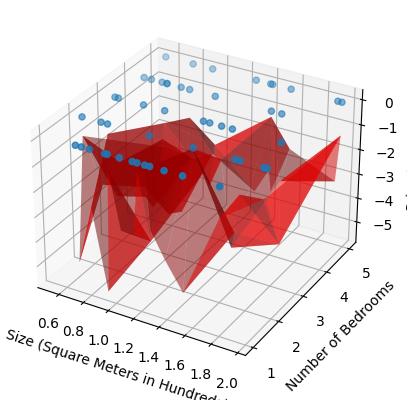

In [59]:
# 3D plot with regression plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y)

# Predicted prices using the model
y_pred = X.dot(w_final) + b_final
ax.plot_trisurf(X1, X2, y_pred, color='red', alpha=0.5)

ax.set_xlabel('Size (Square Meters in Hundreds)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price in $1000')
plt.show()